# MNIST Handwritten Numbers 
### Author: Bryce Freshcorn

#### Keras Demonstration for MITRE Corp. Training

In [1]:
%matplotlib inline
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Data Preprocessing
### Step 1 - Load the data
[`keras.datasets`](https://keras.io/datasets/) module contains commonly used datasets for benchmarking neural network models. In this tutorial, we will be using the MNIST handwritten digits data.

First, we need to load* the data...

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

\* As you can see, the data set is actually downloaded from an S3 bucket.

### Step 2 - Examine the data
Now, let us get a better idea of what the MNIST data is like...

In [3]:
labels_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
               3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt',
               7: ' Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [4]:
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
print('Training images matrix shape: {}'.format(x_train.shape))
print('Training labels vector shape: {}\n'.format(y_train.shape))
print('Testing images matrix shape: {}'.format(x_test.shape))
print('Testing labels vector shape: {}'.format(y_test.shape))

Training images matrix shape: (60000, 28, 28)
Training labels vector shape: (60000,)

Testing images matrix shape: (10000, 28, 28)
Testing labels vector shape: (10000,)


So what is shape telling us here?  The first item in the tuple is the number of training or testing (as defined) samples in the matrix or vector. 
We see that there are 60,000 images in the training set and 10,000 images in the test set.

For the purposes of training our model and evaluating its performance, we want to make sure that the number of samples in `x_train` is the same as the number in `y_train`. Otherwise, it would indicate a fundamental labeling problem with our training data.  We also want to ensure this is true for the testing data as well, since we need that particular data sample to evaluate our model's performance.

You should have noticed that the `y_train` and `y_test` data sets only contain one element. This tells us that these are vectors. This makes sense since these are simply labels corresponding to their samples.

The last two elements in `x_train` and `y_train` tell us that the images in the MNIST data are 28x28 pixels.

Now, let us take a look at what these small images actually look like...

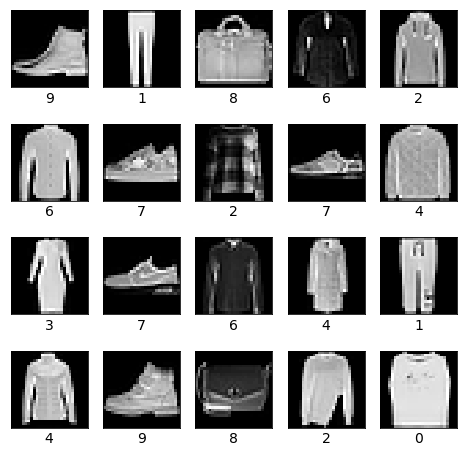

In [5]:
rand_index = randint(0, 60000, size=20)
plt.figure(figsize=(8,8))
for i, index in enumerate(rand_index, 1):
    plt.subplot(4, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off',
                    labelbottom='off', left='off', labelleft='off')
    plt.xlabel(y_train[index], color='black', fontsize=14)
    plt.imshow(x_train[index], cmap='gray')

### Step 3 - Transform data values

In [6]:
scaled_x_train = x_train/255.
scaled_x_test = x_test/255.
hot_y_train = to_categorical(y_train)
hot_y_test = to_categorical(y_test)

### Helper functions

In [7]:
def evaluate_score(model, x, y):
    model_score = model.evaluate(x, y, verbose=1)
    print('\nCategorical Cross-entropy Loss: {}'.format(model_score[0]))
    print('Test Set Accuracy: {}\n\n'.format(model_score[1]))

In [8]:
def show_incorrect_predictions(model, x, y, orig_x):
    real_labels = y.reshape((-1,))
    pred_labels = model.predict_classes(x, batch_size=256, verbose=1)
    label_outputs = list(zip(pred_labels, real_labels))
    incorrect_indices = [i for i, label in enumerate(label_outputs) if label[0] != label[1]]
    
    plt.figure(figsize=(8,10))
    for i, index in enumerate(incorrect_indices, 1):
        if i > 16:
            break
        plt.subplot(4, 4, i)
        plt.tick_params(axis='both', which='both', bottom='off',
                        labelbottom='off', left='off', labelleft='off')
        plt.xlabel('Pred: {}\nReal: {}'.format(labels_dict[pred_labels[index]], 
                                               labels_dict[real_labels[index]]),
                   color='white', fontsize=14)
        plt.imshow(orig_x[index], cmap='gray')

## Vanilla Neural Network Implementation

In [9]:
vanilla_model = Sequential()
vanilla_model.add(Dense(784, activation='relu', input_shape=(28*28,), name='Input'))
vanilla_model.add(Dense(256, activation='relu', name='Hidden_1'))
vanilla_model.add(Dense(128, activation='relu', name='Hidden_2'))
vanilla_model.add(Dense(10, activation='softmax', name='Output'))
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 784)               615440    
_________________________________________________________________
Hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               32896     
_________________________________________________________________
Output (Dense)               (None, 10)                1290      
Total params: 850,586
Trainable params: 850,586
Non-trainable params: 0
_________________________________________________________________


In [10]:
vanilla_model.compile(optimizer='sgd',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
vanilla_initial_weights = vanilla_model.get_weights()

### Transform input MNIST images into vector representations

In [12]:
scaled_x_train_vector = scaled_x_train.reshape(num_train_samples, 28*28)
scaled_x_test_vector = scaled_x_test.reshape(num_test_samples, 28*28)

In [13]:
vanilla_model.fit(scaled_x_train_vector, hot_y_train, batch_size=256, epochs=10,
                  verbose=1, validation_data=(scaled_x_test_vector, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 1.2525 - acc: 0.6460 - val_loss: 0.8196 - val_acc: 0.7372
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.7042 - acc: 0.7738 - val_loss: 0.6633 - val_acc: 0.7786
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.5982 - acc: 0.8030 - val_loss: 0.6028 - val_acc: 0.7861
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.5466 - acc: 0.8171 - val_loss: 0.5497 - val_acc: 0.8120
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.5128 - acc: 0.8254 - val_loss: 0.5250 - val_acc: 0.8185
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.4909 - acc: 0.8311 - val_loss: 0.5514 - val_acc: 0.8005
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.4748 - acc: 0.8358 - val_loss: 0.5037 - val_acc

10000/10000 [==============================] - 0s 41us/step

Categorical Cross-entropy Loss: 0.4928271845817566
Test Set Accuracy: 0.8266


10000/10000 [==============================] - 0s 9us/step


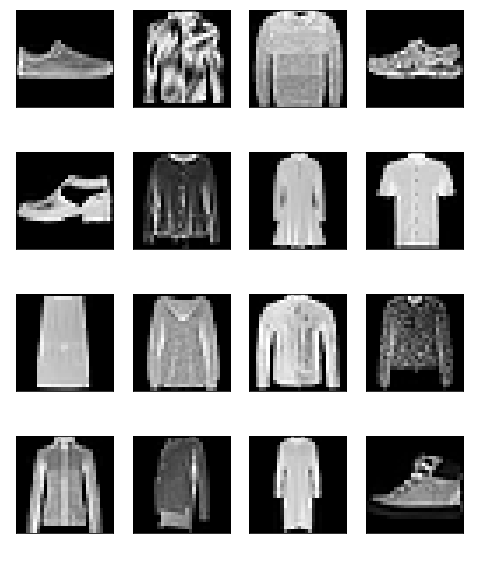

In [14]:
evaluate_score(vanilla_model, scaled_x_test_vector, hot_y_test)
show_incorrect_predictions(vanilla_model, scaled_x_test_vector, y_test, x_test)

In [15]:
vanilla_history = vanilla_model.fit(scaled_x_train_vector, hot_y_train, batch_size=256, epochs=40,
                                    verbose=1, validation_data=(scaled_x_test_vector, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 16us/step - loss: 0.4327 - acc: 0.8494 - val_loss: 0.4863 - val_acc: 0.8251
Epoch 2/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.4254 - acc: 0.8504 - val_loss: 0.4722 - val_acc: 0.8311
Epoch 3/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.4199 - acc: 0.8523 - val_loss: 0.4723 - val_acc: 0.8334
Epoch 4/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.4113 - acc: 0.8556 - val_loss: 0.4541 - val_acc: 0.8370
Epoch 5/40
60000/60000 [==============================] - 1s 14us/step - loss: 0.4074 - acc: 0.8570 - val_loss: 0.4545 - val_acc: 0.8382
Epoch 6/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.4031 - acc: 0.8603 - val_loss: 0.4334 - val_acc: 0.8468
Epoch 7/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.3960 - acc: 0.8626 - val_loss: 0.4287 - val_acc

10000/10000 [==============================] - 0s 37us/step

Categorical Cross-entropy Loss: 0.3921393578529358
Test Set Accuracy: 0.859


10000/10000 [==============================] - 0s 5us/step


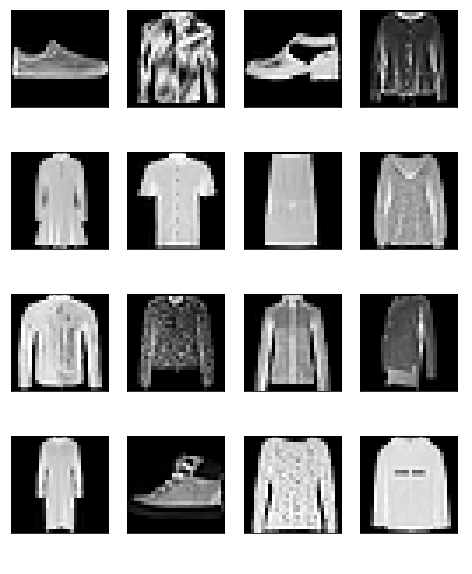

In [16]:
evaluate_score(vanilla_model, scaled_x_test_vector, hot_y_test)
show_incorrect_predictions(vanilla_model, scaled_x_test_vector, y_test, x_test)

## Convolutional Neural Network Implementation

In [17]:
cnn_scaled_x_train = scaled_x_train.reshape(num_train_samples, 28, 28, 1)
cnn_scaled_x_test = scaled_x_test.reshape(num_test_samples, 28, 28, 1)

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, kernel_size=4, activation='relu', padding='same',
                     input_shape=(28,28,1), name='Layer_1_1'))
cnn_model.add(MaxPooling2D(pool_size=2, name='Layer_1_2'))
cnn_model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same',
              name='Layer_2_1'))
cnn_model.add(MaxPooling2D(pool_size=2, name='Layer_2_2'))
cnn_model.add(Flatten(name='Flatten'))
cnn_model.add(Dense(32, activation='relu', name='Layer_3'))
cnn_model.add(Dense(10, activation='softmax', name='Prediction'))
cnn_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1_1 (Conv2D)           (None, 28, 28, 128)       2176      
_________________________________________________________________
Layer_1_2 (MaxPooling2D)     (None, 14, 14, 128)       0         
_________________________________________________________________
Layer_2_1 (Conv2D)           (None, 14, 14, 64)        131136    
_________________________________________________________________
Layer_2_2 (MaxPooling2D)     (None, 7, 7, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
Layer_3 (Dense)              (None, 32)                100384    
_________________________________________________________________
Pre

In [19]:
cnn_model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [20]:
cnn_initial_weights = cnn_model.get_weights()

In [21]:
cnn_model.fit(cnn_scaled_x_train, hot_y_train, batch_size=256, epochs=10,
              verbose=1, validation_data=(cnn_scaled_x_test, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 1.9996 - acc: 0.3473 - val_loss: 1.2430 - val_acc: 0.6027
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.9661 - acc: 0.6659 - val_loss: 0.8151 - val_acc: 0.7194
Epoch 3/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.7639 - acc: 0.7248 - val_loss: 0.7191 - val_acc: 0.7428
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.6818 - acc: 0.7537 - val_loss: 0.9231 - val_acc: 0.6743
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.6376 - acc: 0.7695 - val_loss: 0.6186 - val_acc: 0.7761
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.5970 - acc: 0.7826 - val_loss: 0.6419 - val_acc: 0.7788
Epoch 7/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.5726 - acc: 0.7921 - val_loss: 0.5639 - 

10000/10000 [==============================] - 1s 81us/step

Categorical Cross-entropy Loss: 0.5831542844772339
Test Set Accuracy: 0.7807


10000/10000 [==============================] - 0s 38us/step


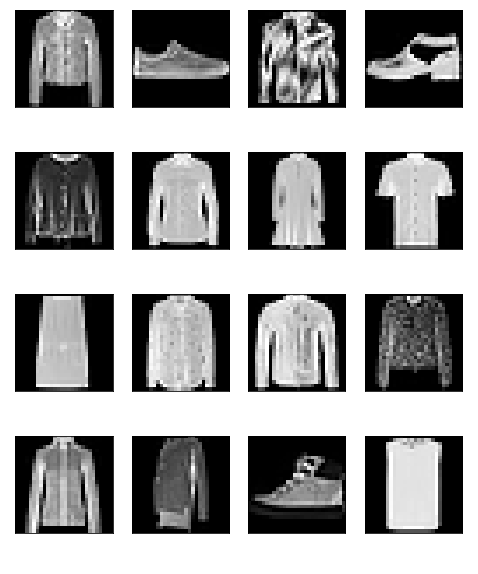

In [22]:
evaluate_score(cnn_model, cnn_scaled_x_test, hot_y_test)
show_incorrect_predictions(cnn_model, cnn_scaled_x_test, y_test, x_test)

In [23]:
cnn_history = cnn_model.fit(cnn_scaled_x_train, hot_y_train, batch_size=256, epochs=40,
                            verbose=1, validation_data=(cnn_scaled_x_test, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 6s 107us/step - loss: 0.4974 - acc: 0.8228 - val_loss: 0.5348 - val_acc: 0.8064
Epoch 2/40
60000/60000 [==============================] - 6s 106us/step - loss: 0.4824 - acc: 0.8278 - val_loss: 0.6788 - val_acc: 0.7213
Epoch 3/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.4711 - acc: 0.8332 - val_loss: 0.4822 - val_acc: 0.8298
Epoch 4/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.4579 - acc: 0.8378 - val_loss: 0.5832 - val_acc: 0.7815
Epoch 5/40
60000/60000 [==============================] - 6s 104us/step - loss: 0.4505 - acc: 0.8388 - val_loss: 0.4700 - val_acc: 0.8299
Epoch 6/40
60000/60000 [==============================] - 6s 106us/step - loss: 0.4393 - acc: 0.8446 - val_loss: 0.4757 - val_acc: 0.8316
Epoch 7/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.4304 - acc: 0.8475 - val_loss: 0.4387 - 

10000/10000 [==============================] - 1s 81us/step

Categorical Cross-entropy Loss: 0.3281820123076439
Test Set Accuracy: 0.8849


10000/10000 [==============================] - 0s 35us/step


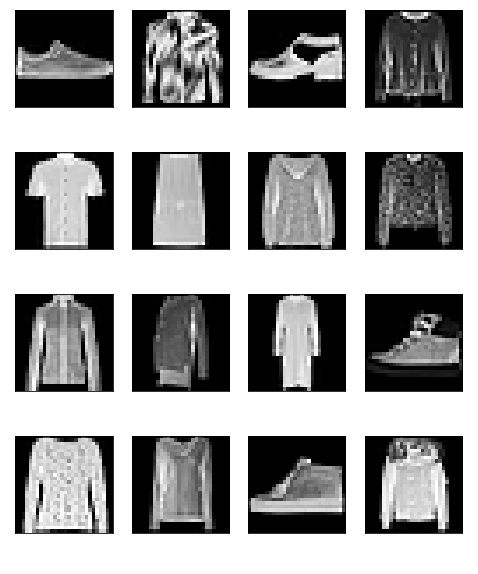

In [24]:
evaluate_score(cnn_model, cnn_scaled_x_test, hot_y_test)
show_incorrect_predictions(cnn_model, cnn_scaled_x_test, y_test, x_test)

In [25]:
vanilla_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [26]:
vanilla_model.set_weights(vanilla_initial_weights)
vanilla_history = vanilla_model.fit(scaled_x_train_vector, hot_y_train, batch_size=256, epochs=40,
                                    verbose=1, validation_data=(scaled_x_test_vector, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 22us/step - loss: 0.5078 - acc: 0.8214 - val_loss: 0.4101 - val_acc: 0.8490
Epoch 2/40
60000/60000 [==============================] - 1s 17us/step - loss: 0.3584 - acc: 0.8697 - val_loss: 0.3744 - val_acc: 0.8663
Epoch 3/40
60000/60000 [==============================] - 1s 19us/step - loss: 0.3208 - acc: 0.8822 - val_loss: 0.3606 - val_acc: 0.8699
Epoch 4/40
60000/60000 [==============================] - 1s 19us/step - loss: 0.2938 - acc: 0.8919 - val_loss: 0.3388 - val_acc: 0.8775
Epoch 5/40
60000/60000 [==============================] - 1s 18us/step - loss: 0.2773 - acc: 0.8957 - val_loss: 0.3194 - val_acc: 0.8863
Epoch 6/40
60000/60000 [==============================] - 1s 19us/step - loss: 0.2607 - acc: 0.9032 - val_loss: 0.3487 - val_acc: 0.8757
Epoch 7/40
60000/60000 [==============================] - 1s 18us/step - loss: 0.2492 - acc: 0.9063 - val_loss: 0.3280 - val_acc

10000/10000 [==============================] - 1s 57us/step

Categorical Cross-entropy Loss: 0.49829178751334546
Test Set Accuracy: 0.8848


10000/10000 [==============================] - 0s 11us/step


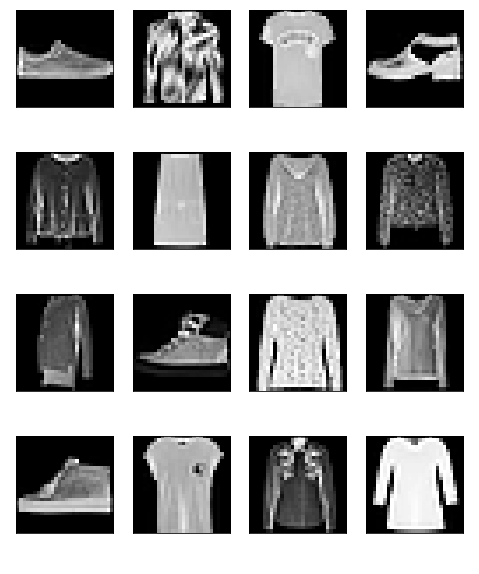

In [27]:
evaluate_score(vanilla_model, scaled_x_test_vector, hot_y_test)
show_incorrect_predictions(vanilla_model, scaled_x_test_vector, y_test, x_test)

In [28]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [29]:
cnn_model.set_weights(cnn_initial_weights)
cnn_history = cnn_model.fit(cnn_scaled_x_train, hot_y_train, batch_size=256, epochs=50,
                            verbose=1, validation_data=(cnn_scaled_x_test, hot_y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.6472 - acc: 0.7778 - val_loss: 0.4097 - val_acc: 0.8529
Epoch 2/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.3631 - acc: 0.8733 - val_loss: 0.3546 - val_acc: 0.8764
Epoch 3/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.3128 - acc: 0.8901 - val_loss: 0.3214 - val_acc: 0.8866
Epoch 4/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.2802 - acc: 0.8995 - val_loss: 0.3129 - val_acc: 0.8895
Epoch 5/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2612 - acc: 0.9070 - val_loss: 0.2852 - val_acc: 0.8992
Epoch 6/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2386 - acc: 0.9143 - val_loss: 0.2741 - val_acc: 0.9050
Epoch 7/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2225 - acc: 0.9202 - val_loss: 0.2685 - 

10000/10000 [==============================] - 1s 86us/step

Categorical Cross-entropy Loss: 0.49797750158876297
Test Set Accuracy: 0.9178


10000/10000 [==============================] - 0s 39us/step


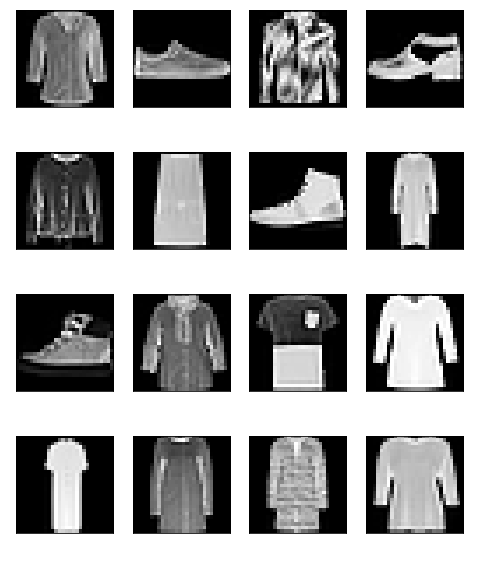

In [30]:
evaluate_score(cnn_model, cnn_scaled_x_test, hot_y_test)
show_incorrect_predictions(cnn_model, cnn_scaled_x_test, y_test, x_test)